In [ ]:
!pip install PyWavelets==1.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.7 MB/s eta 0:00:00


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)
Extracting the top 50 PCs...
done in 0.945s


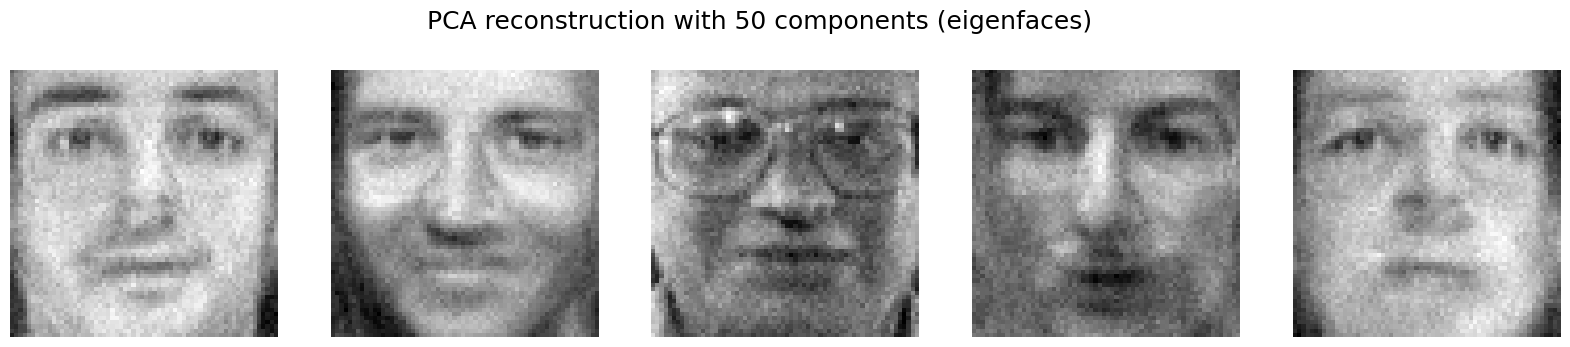

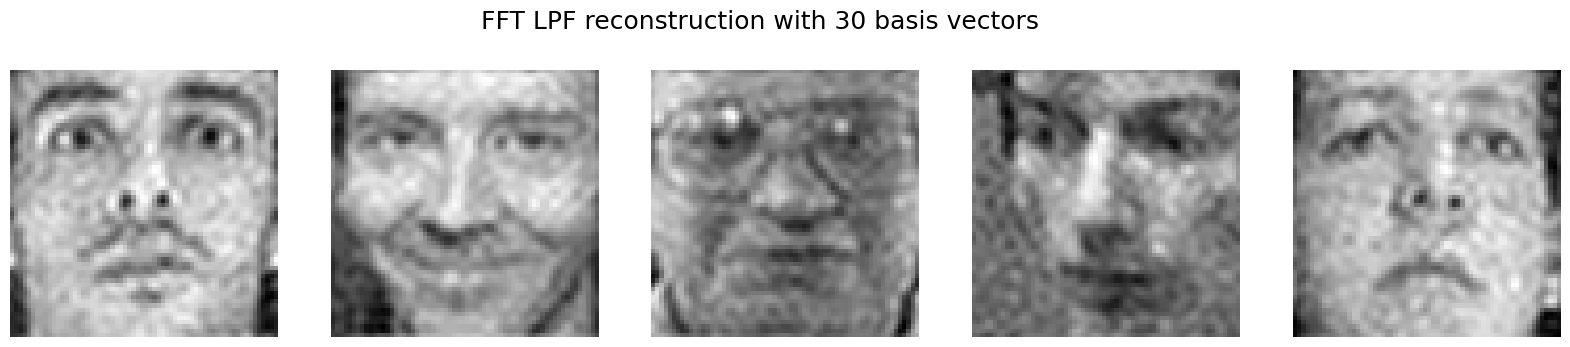

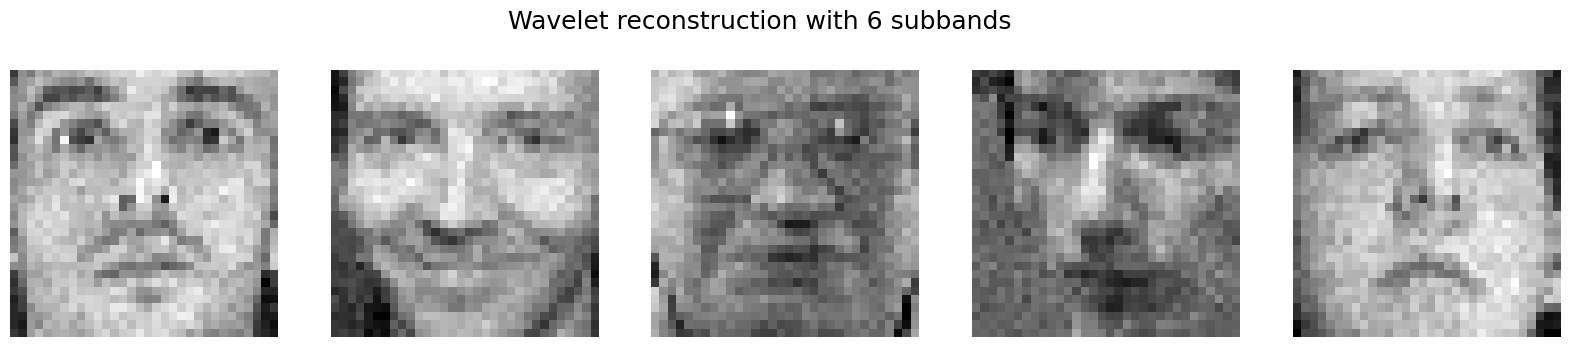

In [ ]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from skimage.util import random_noise
from skimage import img_as_float
from time import time
import scipy.fftpack as fp
import pywt

rng = RandomState(0)

dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
original = img_as_float(dataset.data)
faces = original.copy()
print(faces.shape)

image_shape = (64, 64)
n_samples, n_features = faces.shape

faces = random_noise(faces, var=0.005)

n_components = 50
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
print(f"Extracting the top {n_components} PCs...")
t0 = time()
faces_recons = estimator.inverse_transform(estimator.fit_transform(faces))
train_time = time() - t0
print(f"done in {train_time:.3f}s")

indices = np.random.choice(n_samples, 5, replace=False)
plt.figure(figsize=(20, 4))
for i in range(len(indices)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(faces_recons[indices[i], :], image_shape), cmap="gray")
    plt.axis("off")
plt.suptitle(f'PCA reconstruction with {n_components} components (eigenfaces)', size=18)
plt.show()

n_components = 30
plt.figure(figsize=(20, 4))
for i in range(len(indices)):
    freq = fp.fftshift(fp.fft2(np.reshape(faces[indices[i], :], image_shape).astype(float)))

    freq[:freq.shape[0]//2 - n_components//2, :] = 0
    freq[freq.shape[0]//2 + n_components//2:, :] = 0
    freq[:, :freq.shape[1]//2 - n_components//2] = 0
    freq[:, freq.shape[1]//2 + n_components//2:] = 0

    plt.subplot(1, 5, i + 1)
    plt.imshow(fp.ifft2(fp.ifftshift(freq)).real, cmap="gray")
    plt.axis("off")
plt.suptitle(f'FFT LPF reconstruction with {n_components} basis vectors', size=18)
plt.show()

plt.figure(figsize=(20, 4))
wavelet = pywt.Wavelet('haar')
for i in range(len(indices)):
    wavelet_coeffs = pywt.wavedec2(np.reshape(faces[indices[i], :], image_shape).astype(float), wavelet)

    plt.subplot(1, 5, i + 1)
    plt.imshow(pywt.waverec2(wavelet_coeffs[:-1], wavelet), cmap="gray")
    plt.axis("off")
plt.suptitle(f'Wavelet reconstruction with {len(wavelet_coeffs) - 1} subbands', size=18)
plt.show()
